## Day 1 import library and print version

In [2]:
import pandas as pd
print('Pandas version: ', pd.__version__)
import numpy as np
print('Numpy version: ', np.__version__)
import matplotlib.pyplot as plt
import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

Pandas version:  1.1.2
Numpy version:  1.20.2
Matplotlib version:  3.1.3


## Day 1 Create Series

In [3]:
# Create from numpy list
arr = [0, 1, 2, 3]
df = pd.Series(arr)
df

0    0
1    1
2    2
3    3
dtype: int64

In [4]:
# Create from numpy dictionary, key:value
d = {'a':1,
     'b':2,
     'c':3,
     'd':4,
     'e':5
    }
df = pd.Series(d)
df

a    1
b    2
c    3
d    4
e    5
dtype: int64

## Day 2: Create Dataframe

In [7]:
# Create df from array
dates = pd.date_range('today', periods=6) # 定义时间序列作为 index
num_arr = np.random.randn(6,4) # 传入 numpy 随机数组
columns = ['A','B','C','D'] # 将列表作为列名

df = pd.DataFrame(num_arr, index = dates, columns = columns)
df

,A,B,C,D
2022-02-26 15:26:11.865081,0.481817,0.591012,1.089934,-0.197978
2022-02-27 15:26:11.865081,1.341256,0.044028,-0.335583,-0.480865
2022-02-28 15:26:11.865081,0.312725,1.296387,0.264718,0.708145
2022-03-01 15:26:11.865081,0.412484,-0.537091,0.678329,-0.622836
2022-03-02 15:26:11.865081,-0.197008,0.867032,-1.200985,0.599352
2022-03-03 15:26:11.865081,1.361720,-1.702020,0.886762,0.738831


In [ ]:
# Create from csv, seperator as ;, encoding as 'gbk'
#, ; |
# gbk, utf-8, etc.

df = pd.read_csv('test.csv')

In [36]:
# Create from dictionary
data = {
    'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
    'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
    'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']
}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


## Day 2: Show Dataframe info

In [10]:
# Show the basic info of the dataframe, 
# including the number of lines
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    10 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [11]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [12]:
# show the first 3 lines of dataframe
# method 1
df.iloc[:3]
# method 2
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


## Day 3: Abstract data from the dataframe

In [13]:
# get the columns from the dataset
# method 1
df.loc[:, ['animal', 'age']]
# method 2
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [20]:
# 取出索引为[3, 4, 8]行的animal和age列
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [22]:
# Get the rows that have age > 3
df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


In [24]:
# get the rows that missing age info
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [26]:
# get the rows that have age between 2 and 4
# method 1
df[(df['age']>2) & (df['age']<4)]
# method 2
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


In [27]:
# modify the age of row f to 1.5
df.loc['f', 'age'] = 1.5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


## Day 4: Calculate the sum and average

In [29]:
# calculate the sum of visits
df['visits'].sum()

19

In [30]:
# calculate the average of age by different animals
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [36]:
# count the number of animals by type
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

## Day 5: Data sorting

In [32]:
# order by age in a decending way
# order by visits in a ascending way
df.sort_values(
    by=['age', 'visits'], 
    ascending=[False, True]
)

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


## Day 5: Data Replacement

In [39]:
## Change [yes, no] to [True, False]
df['priority'] = df['priority'].map({'yes': True, 'no': False})

In [49]:
# change 'snake' to 'python'
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,cat,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,dog,2.0,3,False
g,dog,4.5,1,False
h,dog,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


## Day 6: Pivot table

In [45]:
# calculate the avg age by animals and by visits
df.pivot_table(
    index='animal', 
    columns='visits', 
    values='age', 
    aggfunc='mean'
)

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


## Day 6: add and delete a row

In [53]:
# assert row 'k'
df.loc['k'] = [5.5, 'dog', 'no', 2]
df

,animal,age,visits,priority
a,cat,2.5,1,1
b,cat,3,3,1
c,cat,0.5,2,0
d,dog,NaN,3,1
e,dog,5,2,0
f,dog,2,3,0
g,dog,4.5,1,0
h,dog,NaN,1,1
i,dog,7,2,0
j,dog,3,1,0


In [54]:
# delete row k
df = df.drop('k', inplace=True)
df

## Day 7: Visualization

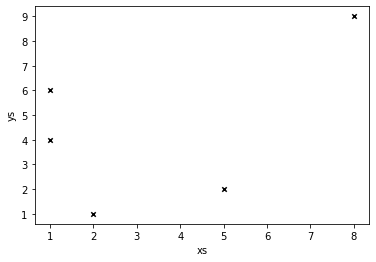

In [95]:
## plot the scatter plot
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df.plot.scatter("xs", "ys", color = "black", marker = "x")

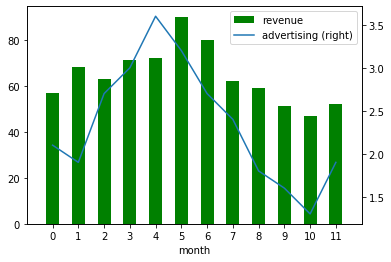

In [55]:
# visualize a 2d data, sharing the x-axis
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));


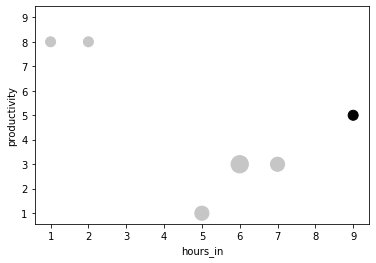

In [94]:
# visualize a 4d dataframe
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,3,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 100, c = df.caffienated)


## Day 8: Delete dup rows

In [57]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})

df1 = df.loc[df['A'].shift() != df['A']]
df1
# 方法二
# df1 = df.drop_duplicates(subset='A')

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


## Day 8: Delete by the avg of row

In [55]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
df1 = df.sub(df.mean(axis=1), axis=0)
df1

,0,1,2
0,0.428384,-0.003109,-0.425275
1,-0.020119,0.103551,-0.083432
2,-0.182754,-0.101750,0.284504
3,0.463954,-0.353033,-0.110921
4,-0.275554,0.006566,0.268988


## Day 9: Find the row with mim sum

In [64]:
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
df.sum().idxmin()

'd'

## Day 9: Get the sum of col A 

In [68]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


## Day 10: calculate sum of B within a window of 10 in row A

In [74]:
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
print(df)
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99
A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


## Day 11: Calculate the distance to the closest 0 or the left end

In [78]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

# 方法二
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()
df
# 方法三
# df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
#first_zero_idx = (df['X'] == 0).idxmax()
# df['Y'].iloc[0:first_zero_idx] += 1


,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


## Day 12: Get the index of largest 3 values

In [77]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.037757  0.001239  0.595735
1  0.473803  0.698951  0.853151
2  0.846329  0.685222  0.229615
3  0.714984  0.391756  0.110737
4  0.923312  0.420243  0.489775


[(0, 2), (2, 1), (0, 4)]

## Day 13: replace negetive value with avg value 

In [79]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)

def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)


   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


## Day 14: Get avg of sliding window of 3 values

In [85]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()


   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Day 15: Workday of 2015 as the index of a series

In [64]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

s.head(10)

2015-01-01    0.547479
2015-01-02    0.584766
2015-01-05    0.353549
2015-01-06    0.542552
2015-01-07    0.522845
2015-01-08    0.244387
2015-01-09    0.027598
2015-01-12    0.030955
2015-01-13    0.698069
2015-01-14    0.020312
Freq: B, dtype: float64

## Day 16: sum of all wednesdays

In [65]:
s[s.index.weekday == 2].sum()

27.178430072033137

## Day 16: average of each month

In [66]:
s.resample('M').mean()

2015-01-31    0.473611
2015-02-28    0.565909
2015-03-31    0.572161
2015-04-30    0.577866
2015-05-31    0.634996
2015-06-30    0.451247
2015-07-31    0.405405
2015-08-31    0.500411
2015-09-30    0.516158
2015-10-31    0.522621
2015-11-30    0.447106
2015-12-31    0.483588
Freq: M, dtype: float64

## Day 17: find the day with largest value in every 4 months

In [67]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-23
2015-05-31   2015-05-19
2015-09-30   2015-09-28
2016-01-31   2015-12-31
Freq: 4M, dtype: datetime64[ns]

## Day 17: Create a series of the third Thursday of each month from 2015-2016

In [68]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Day 18: fill the missing value by a row adding 10

In [85]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [82]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


## Day 19: Split the string by from and to

In [83]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
df


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


## Day 20: String Regex

In [72]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,LoNDon,paris
1,10055,[],Air France,MAdrid,miLAN
2,10065,"[24, 43, 87]",British Airways,londON,StockhOlm
3,10075,[13],Air France,Budapest,PaRis
4,10085,"[67, 32]",Swiss Air,Brussels,londOn
